<a href="https://colab.research.google.com/github/Sharath2021/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [164]:
from google.colab import drive

In [165]:
stock_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Capstone_Regression/data_YesBank_StockPrices.csv")

In [166]:
stock_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [167]:
stock_df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [168]:
stock_df.shape

(185, 5)

In [169]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [170]:
#importing datetime
from datetime import datetime 
stock_df['Date'] = stock_df['Date'].apply(lambda x: datetime.strptime(x,"%b-%y"))

In [171]:
stock_df.head(3)

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30


In [172]:
stock_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [173]:
#any duplicate values present in our data.
len(stock_df[stock_df.duplicated()])

0

Text(0, 0.5, 'Density')

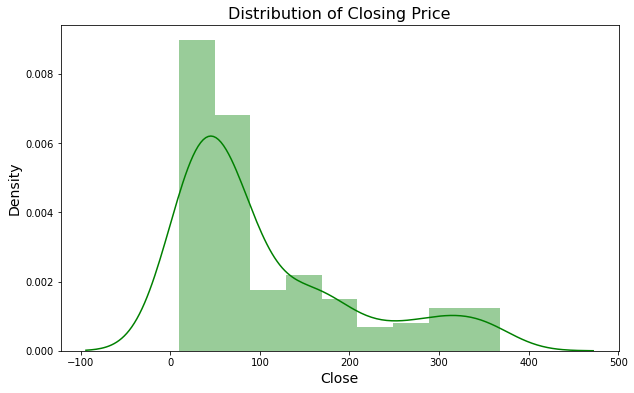

In [191]:
#Distribution of the dependent variable 
plt.figure(figsize = (10,6))
sns.distplot(stock_df['Close'],color = 'g')
plt.title('Distribution of Closing Price',fontsize = 16)
plt.xlabel('Close',fontsize = 14)
plt.ylabel('Density',fontsize = 14)

Text(0.5, 1.0, ' Normal Distribution of Closing Price')

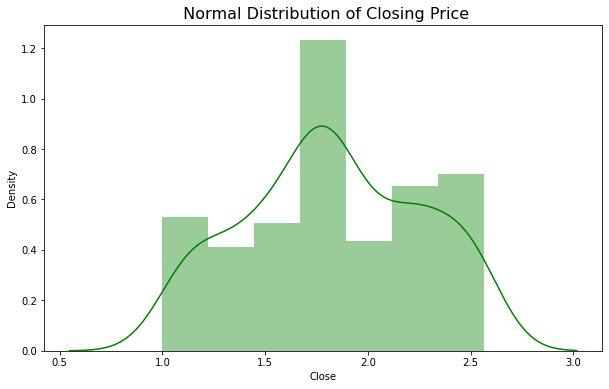

In [192]:
# Applying Log Transformation to get normal distrbution
plt.figure(figsize = (10,6))
sns.distplot(np.log10(stock_df['Close']),color = 'g')
plt.title(' Normal Distribution of Closing Price',fontsize = 16)

In [176]:
stock_df_dup=stock_df.copy()

In [177]:
#Classifying independent and dependent variables
indep_var=stock_df_dup[['High','Low','Open']]
dep_var=stock_df_dup['Close']

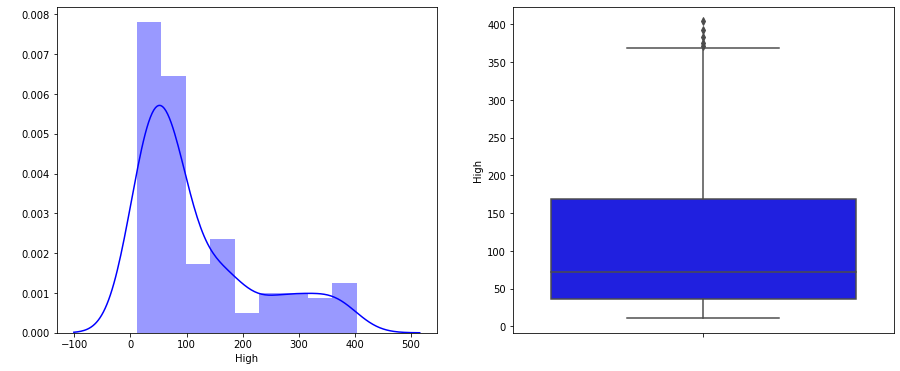

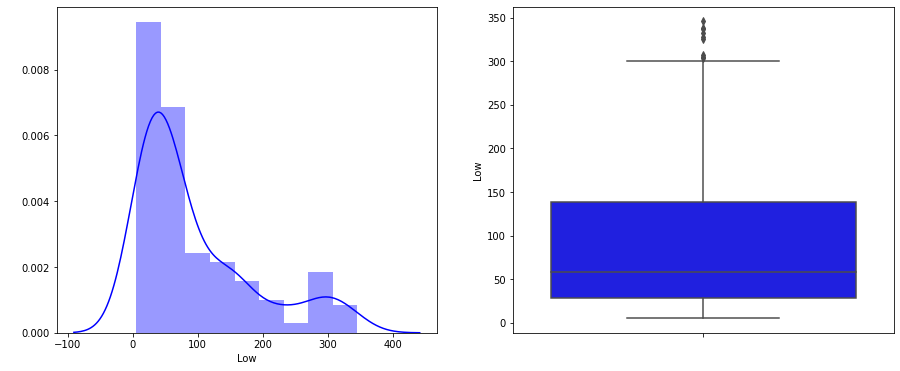

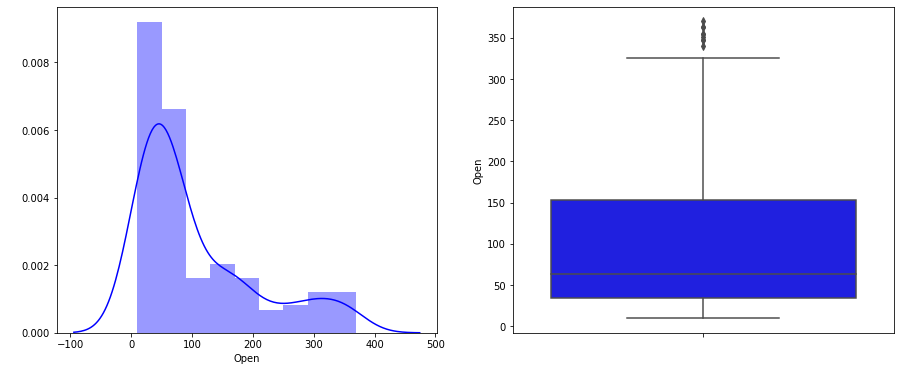

In [178]:
#Distribution and box plot of independent variables
for var in indep_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(stock_df_dup[var],color='b')
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=stock_df_dup[var],color='b')
    fig.set_title('')
    fig.set_ylabel(var)

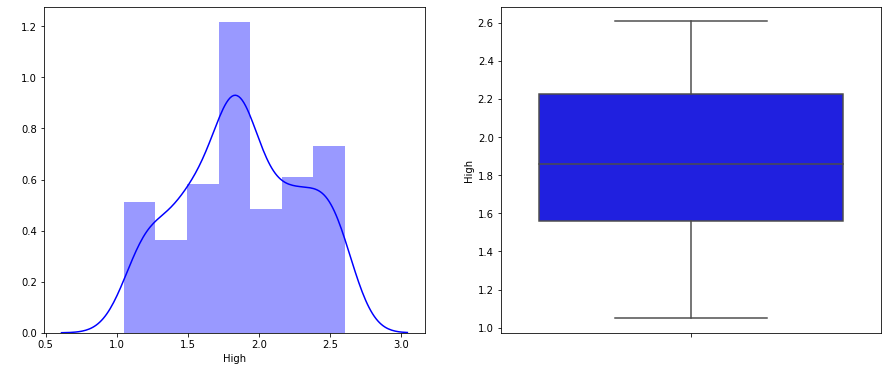

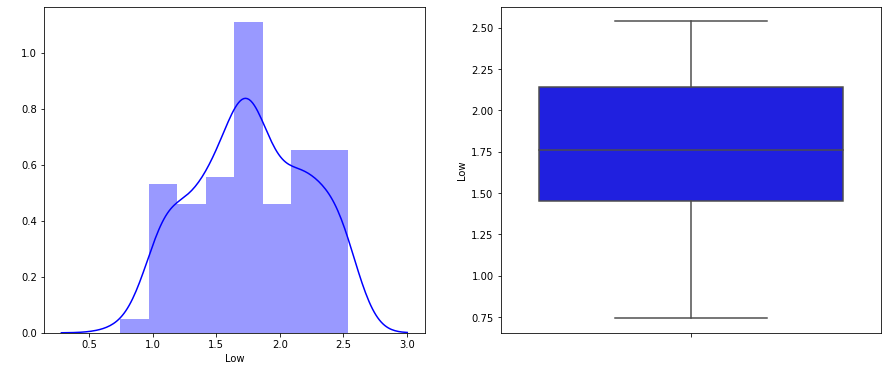

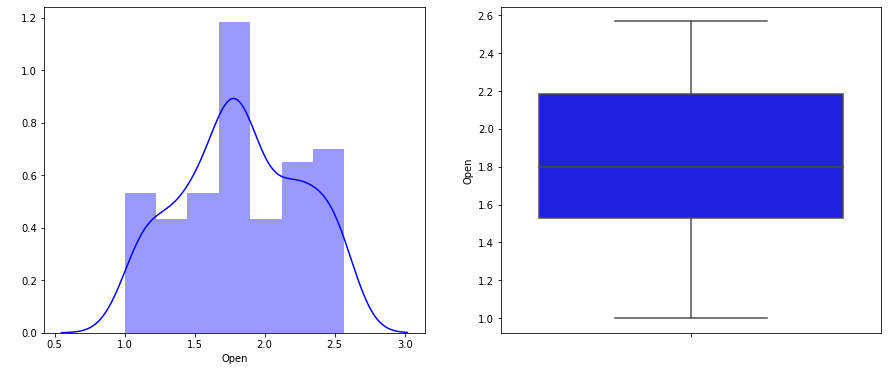

In [179]:
#Normal Distribution of independent variables
for var in indep_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(stock_df_dup[var]),color='b')
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=np.log10(stock_df_dup[var]),color='b')
    fig.set_title('')
    fig.set_ylabel(var)

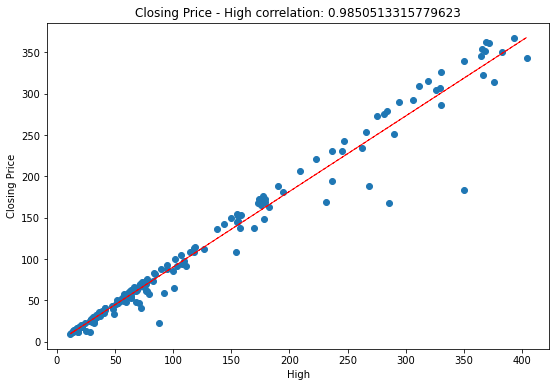

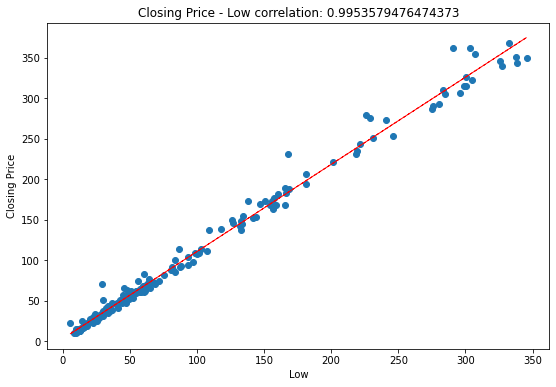

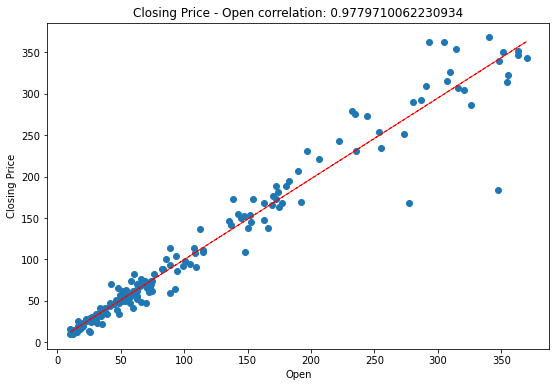

In [180]:
#correlation between dependent with all independent varibles
for col in indep_var:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = stock_df_dup[col]
   label = stock_df_dup['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('Closing Price')
   ax.set_title('Closing Price - ' + col + ' correlation: ' + str(correlation))
   z = np.polyfit(stock_df_dup[col], stock_df_dup['Close'], 1)
   y_hat = np.poly1d(z)(stock_df_dup[col])
 
   plt.plot(stock_df_dup[col], y_hat, "r--", lw=1)
 
plt.show()

In [181]:
#adding average column
stock_df_dup['Average'] = (stock_df_dup['Low'] + stock_df_dup['High'])/2
#adding month column
stock_df_dup['Month'] = stock_df_dup['Date'].apply(lambda y: y.strftime('%B'))
#introducing new features of name year
stock_df_dup['Year'] = stock_df_dup['Date'].apply(lambda z: z.strftime('%Y'))

In [182]:
#Making date column as index
stock_df_dup.index = stock_df_dup['Date']
stock_df_dup.drop('Date',axis = 1,inplace = True)

In [183]:
stock_df_dup.head()

,Open,High,Low,Close,Average,Month,Year
Date,,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.625,July,2005
2005-08-01,12.58,14.88,12.55,13.42,13.715,August,2005
2005-09-01,13.48,14.87,12.27,13.30,13.570,September,2005
2005-10-01,13.20,14.47,12.40,12.99,13.435,October,2005
2005-11-01,13.35,13.88,12.88,13.41,13.380,November,2005


In [184]:
# Create a column 'Prediction' and shift 'n' Months for future prediction
future_months = 3
stock_df_dup['Prediction'] = stock_df_dup[['Close']].shift(-future_months)               
stock_df_dup.head(3)

,Open,High,Low,Close,Average,Month,Year,Prediction
Date,,,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.625,July,2005,12.99
2005-08-01,12.58,14.88,12.55,13.42,13.715,August,2005,13.41
2005-09-01,13.48,14.87,12.27,13.30,13.570,September,2005,13.71


In [185]:
stock_df_dup['Prediction'].fillna(0, inplace=True)

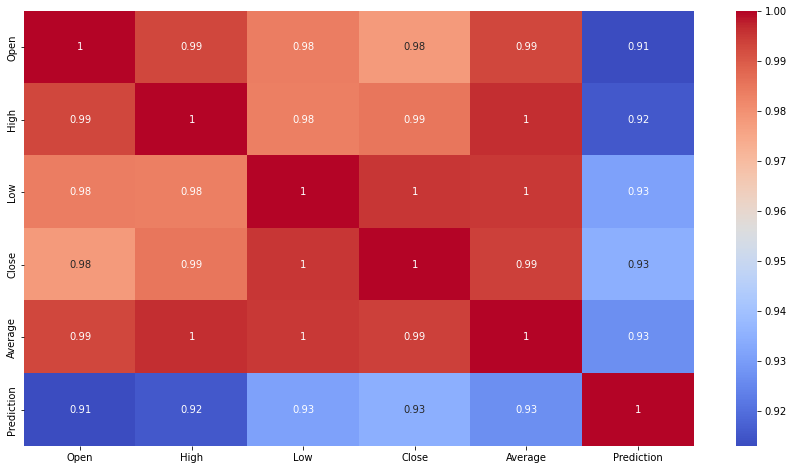

In [186]:
plt.figure(figsize=(15,8))
correlation = stock_df_dup.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [187]:
# drop prediction field
stock_df_dup.drop('Prediction',axis = 1,inplace = True)

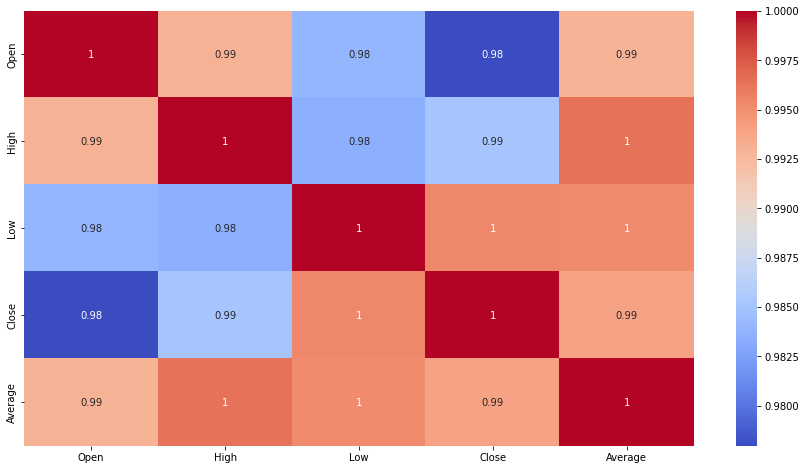

In [188]:
#heatmap for correlation
plt.figure(figsize=(15,8))
correlation = stock_df_dup.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [189]:
# Multicollinearity Check
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(data):
  
  #calculating VIF
  vif = pd.DataFrame()
  vif['Variables'] = data.columns
  vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
  return (vif)

In [190]:
calc_vif(stock_df[[i for i in stock_df.describe().columns if i not in ['Date']]])

,Variables,VIF
0,Open,288.504853
1,High,323.952468
2,Low,424.612257
3,Close,428.401649
